# LH008 🟢 PySpark Drills (Part 2)

>  **Note**: this tutorial is provided for educational purposes, for members of the [Fabric Dojo community](https://skool.com). All content contained within is protected by Copyright © law. Do not copy or re-distribute. 

Welcome to the 2nd of five drill-style tutorials. The goal of this mini-series is to expose you to a wide variety of commonly used PySpark functions. 

In this 2nd tutorial in the mini-series, we will look at Dataframe filtering techniques. 

You'll be given an empty code cell to write the code for each drill. Try to complete each drill without the use of the walkthrough video, but it's there if you need it! 

#### Prerequisites
1. You should already have a Lakehouse in your Fabric Workspace (from the previous exercise) - LH007_PropertyLH 
2. Load this notebook into your Fabric Workspace. Connect this notebook to the LH007_PropertyLH Lakehouse. 
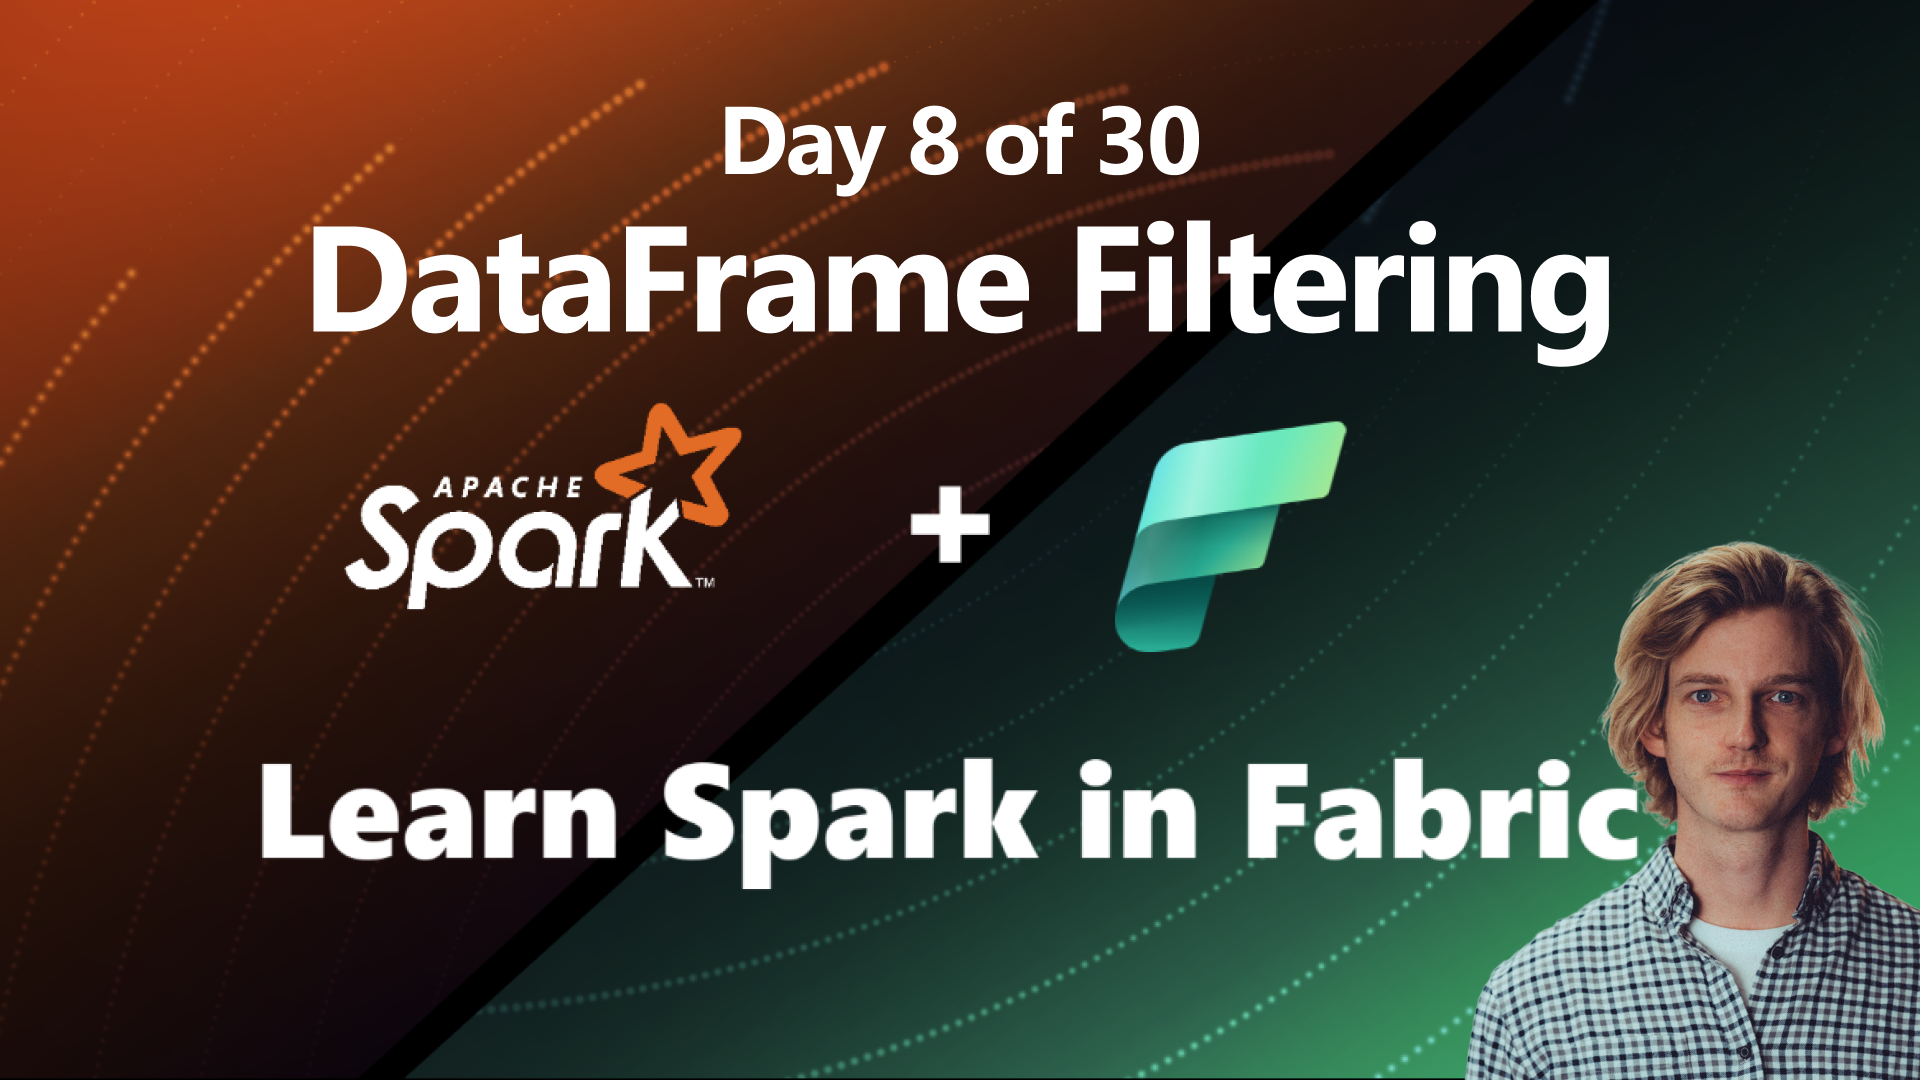

#### Drill 2.1: Data loading from CSV

**Run the script below to load the `property-sales.csv` file from `Files/` into a Spark dataframe.** 

It also cleans some of the column names - take note of the chaining inside the ( ) syntax. 


In [ ]:
df = (
    spark.read.format("csv")
        .option("header","true")
        .option("inferSchema", True)
        .load("Files/property-sales.csv")
        .withColumnsRenamed({'Address ': 'Address', 'City ': 'City', 'SalePrice ($)': 'SalePriceUSD'})
)

display(df)

#### Drill 2.2: Simple filtering

Using [df.filter()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html), **filter your dataframe to show only the records for which the 'City' column is equal to 'Los Angeles'.** 

Visualise your results using df.show():  

In [ ]:
# filtering only property sales from New York
df.filter(df['City'] == "Los Angeles").show()


Using [df.filter()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html) still, **filter your dataframe, but this time, show the opposite: all the property sales outside of Los Angeles.** 


In [ ]:
# not equal to
df.filter(df['City'] != "Los Angeles").show()

#### Drill 2.3: String-based filtering
Next we'll take a look at filtering Spark dataframe based on the contents in a string column. 

Using [df.Column.startswith()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.startswith.html), filter your dataframe to return only the records for which the `City` column begins with 'Los' 


Using [df.Column.endswith()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.endswith.html), filter your dataframe to return only the records for which the `City` column ends with with 'ta' 



In [ ]:
#startswith Los 
df.filter(df.City.startswith("Los")).show()

#ends with ta  
df.filter(df.City.endswith("ta")).show()

Using [df.Column.contains()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.contains.html), **filter the dataframe to return only rows where the Type columns contains 'House':**

In [ ]:
# filter df if the Type contains 'House' 

df.filter(df.Type.contains('House')).show() 

#### Drill 2.4 Multiple conditions

We can use the & operator (and) and the | operator (or) to add multiple conditions to our filtering logic. 

**Write a filter statement, that returns the rows where the City is not 'Atlanta' and the SalePriceUSD is more than 400k:** 


In [ ]:
# Multple conditions, with & operator
df.filter((df.City != 'Atlanta') & (df.SalePriceUSD > 400000) ).show()

**Write a filter statement, that returns the rows where the City is 'Atlanta' OR 'Los Angeles':**

In [ ]:
# Multple conditions, with | operator
df.filter((df.City == 'Atlanta') | (df.City == 'Los Angeles')).show()

We can also use the isin() syntax, similar to how it works in T-SQL. 

**Write a filter statement, that returns the rows where the City is in the following list: ["New York", "Los Angeles"]:**

In [ ]:
# list
cities_we_care_about=["New York", "Los Angeles"]

#Filter df if df.City is in the list cities_we_care_about
df.filter(df.City.isin(cities_we_care_about)).show()

#### Drill 2.5: SQL LIKE filtering
If you're coming from a T-SQL background, and you like to use the LIKE operator with the % wildcard, good news! You can also do that with Spark. 

Using [df.Column.like()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.like.html), **write a filter statement that returns the rows where the Type column contains the word 'House' somewhere in the string:**

(it can have anything else before or after).

In [ ]:
# filer where 'House' appears somewhere in df.Type
df.filter(df.Type.like("%House%")).show()


Using [df.Column.like()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.like.html), **write a filter statement that returns the rows where string of the Address column  ends with 'avenue':**

In [ ]:
# filter where df.Address endswith avenue
df.filter(df.Address.like("%avenue")).show()

#### Drill 2.6: Using Spark SQL for filtering
As well as using the PySpark APIs (aka `df.filter()`) to do our filtering, you can also leverage your existing SQL knowledge to filter a dataframe using Spark SQL. 

First, **save your dataframe as a temporary view.** 

Then, using spark.sql(), **write a Spark SQL query that filters the temporary view to return only the sale information for Apartments:** 

In [ ]:
# create a Temporary View
df.createOrReplaceTempView("property_sales")

# write a Spark SQL where statement, and display the results
spark.sql('''
    SELECT * FROM property_sales 
    WHERE Type = 'Apartment'
''').show()


#### End